In [1]:
import numpy as np
import matplotlib.pyplot as plt
from StarV.fun.tansig import TanSig
from StarV.fun.logsig import LogSig

import copy
import scipy.sparse as sp
from scipy.optimize import linprog
from scipy.linalg import block_diag
from StarV.set.sparsestar import SparseStar
from StarV.set.star import Star

from StarV.util.plot import plot_2D_Star
from matplotlib import pyplot as plt

np.set_printoptions(precision=10)

In [2]:
"""Test Minkowski Sum"""
dim = 2
N = 4
S1 = SparseStar.rand(dim, N)
print('S1: ---------------\n')
print(S1)
print(S1.__repr__())

S2 = SparseStar.rand(dim, N)
print('S2: ---------------\n')
print(S2)

S3 = S1.minKowskiSum(S2)
print('S3: ---------------\n')
print(S3)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
S1: ---------------

SparseStar Set:
A: 
[[0. 1. 0.]
 [0. 0. 1.]]
C_csc: 
[[ 0.9686988738  0.2482387802]
 [ 0.475783502  -0.8795624249]
 [-0.7211285649  0.6928012651]
 [-0.9973412037 -0.0728733381]]
d: [ 1.0810479776 -0.0445487174  0.0218576062 -0.6264240007]
pred_lb: [0.581558194  0.3755609839]
pred_ub: [0.968717283  0.9419147796]
pred_depth: [0. 0.]
dim: 2
nVars: 2
nZVars: 0


SparseStar Set:
A: (2, 3)
C: (4, 2)
d: (4,)
pred_lb: (2,)
pred_ub: (2,)
pred_depth: (2,)
dim: 2
nVars: 2
nZVars: 0


S2: ---------------

SparseStar Set:
A: 
[[0. 1. 0.]
 [0. 0. 1.]]
C_csc: 
[[-0.089515421  -0.9959854363]
 [ 0.7826216865  0.6224976272]
 [-0.7657452963 -0.6431439506]
 [ 0.1682159572  0.985750167 ]]
d: [-0.8122261143  0.9339793127 -0.6399517656  0.9773556091]
pred_lb: [0.0034829112 0.762770482 ]
pred_ub: [0.5866902304 0.9908897412]
pred_depth: [0. 0.]
dim: 2
nVars: 2
nZVars: 0


S3: ---------------

SparseS

In [3]:
"""Test Affine Mapping"""
W = np.random.rand(dim, dim)
b = np.random.rand(dim)
print('W: \n{} \nb:{}'.format(W, b))
Sa = S1.affineMap(W, b)
print('Sa: ---------------\n')
print(Sa)

W: 
[[0.0158542224 0.952565396 ]
 [0.8226567837 0.4300452225]] 
b:[0.7810978408 0.8324443643]
Sa: ---------------

SparseStar Set:
A: 
[[0.7810978408 0.0158542224 0.952565396 ]
 [0.8324443643 0.8226567837 0.4300452225]]
C_csc: 
[[ 0.9686988738  0.2482387802]
 [ 0.475783502  -0.8795624249]
 [-0.7211285649  0.6928012651]
 [-0.9973412037 -0.0728733381]]
d: [ 1.0810479776 -0.0445487174  0.0218576062 -0.6264240007]
pred_lb: [0.581558194  0.3755609839]
pred_ub: [0.968717283  0.9419147796]
pred_depth: [0. 0.]
dim: 2
nVars: 2
nZVars: 0




In [4]:
"""Test Translation"""
v = np.random.rand(dim)
print('v: ', v)
Sv = S1.translation(v)
print('Sv: ---------------\n')
print(Sv)

v:  [0.1154977904 0.0792398024]
Sv: ---------------

SparseStar Set:
A: 
[[0.1154977904 1.           0.          ]
 [0.0792398024 0.           1.          ]]
C_csc: 
[[ 0.9686988738  0.2482387802]
 [ 0.475783502  -0.8795624249]
 [-0.7211285649  0.6928012651]
 [-0.9973412037 -0.0728733381]]
d: [ 1.0810479776 -0.0445487174  0.0218576062 -0.6264240007]
pred_lb: [0.581558194  0.3755609839]
pred_ub: [0.968717283  0.9419147796]
pred_depth: [0. 0.]
dim: 2
nVars: 2
nZVars: 0




In [5]:
"""Test SparseStar.getRanges()"""
print('getRanges estimate [ub, lb]:')
print(np.column_stack(Sa.getRanges('estimate')))
print('getRange gurobi [ub, lb]:')
print(np.column_stack(Sa.getRanges('gurobi')))
print('getRange glpk [ub, lb]:')
print(np.column_stack(Sa.getRanges('glpk')))
print('getRange linprog [ub, lb]:')
print(np.column_stack(Sa.getRanges('linprog')))
print('getRange gurobi with relaxFactor [ub, lb]:')
print(np.column_stack(Sa.getRanges('gurobi', 0.5)))

getRanges estimate [ub, lb]:
[[1.1480643911 1.6936915251]
 [1.4723753646 2.0344321597]]
getRange gurobi [ub, lb]:
[[1.1483671186 1.6921994369]
 [1.4880835328 1.9570094769]]
getRange glpk [ub, lb]:
[[1.1483671186 1.6921994369]
 [1.4880835328 1.9570094769]]
getRange linprog [ub, lb]:
[[1.1483671186 1.6921994369]
 [1.4880835328 1.9570094769]]
getRange gurobi with relaxFactor [ub, lb]:
[[1.1480643911 1.6936915251]
 [1.4723753646 2.0344321597]]


In [6]:
"""Test SparseStar.getRange()"""
dim = 5
N_cstr = 10
Sr = SparseStar.rand(dim, N_cstr)

W = np.random.rand(dim, dim)
b = np.random.rand(dim)
Sra = Sr.affineMap(W, b)

print('getRanges estimate [lb, ub]:')
print(np.column_stack(Sra.getRanges('estimate')))
print('getRange gurobi [lb, ub]:')
print(np.column_stack(Sra.getRanges('gurobi')))
print('getRange glpk [lb, ub]:')
print(np.column_stack(Sra.getRanges('glpk')))
print('getRange linprog [lb, ub]:')
print(np.column_stack(Sra.getRanges('linprog')))
print('getRange gurobi with relaxFactor [lb, ub]:')
print(np.column_stack(Sra.getRanges('gurobi', 0.5)))

getRanges estimate [lb, ub]:
[[0.4962393654 2.7903148949]
 [0.5450596758 2.4240395052]
 [0.4248240213 2.5038303735]
 [1.1585468165 3.8851943554]
 [0.2337754053 1.7434597149]]
getRange gurobi [lb, ub]:
[[0.9588619189 2.1366297698]
 [0.9828406496 1.9633592501]
 [0.7896856659 1.8755394501]
 [1.5634966044 2.8712963158]
 [0.3606579588 1.3036414293]]
getRange glpk [lb, ub]:
[[0.9588619189 2.1366297698]
 [0.9828406496 1.9633592501]
 [0.7896856659 1.8755394501]
 [1.5634966044 2.8712963158]
 [0.3606579588 1.3036414293]]
getRange linprog [lb, ub]:
[[0.9588619189 2.1366297698]
 [0.9828406496 1.9633592501]
 [0.7896856659 1.8755394501]
 [1.5634966044 2.8712963158]
 [0.3606579588 1.3036414293]]
getRange gurobi with relaxFactor [lb, ub]:
[[0.4962393654 2.7903148949]
 [0.5450596758 2.4240395052]
 [0.4248240213 2.5038303735]
 [1.1585468165 3.8851943554]
 [0.2337754053 1.7434597149]]


In [7]:
"""Test SparseStar.getRange()"""
print('getRanges estimate [lb, ub]:')
print(np.column_stack(Sra.getRange(3, 'estimate')))
print('getRange gurobi [lb, ub]:')
print(np.column_stack(Sra.getRange(3, 'gurobi')))
print('getRange glpk [lb, ub]:')
print(np.column_stack(Sra.getRange(3, 'glpk')))
print('getRange linprog [lb, ub]:')
print(np.column_stack(Sra.getRange(3, 'linprog')))

getRanges estimate [lb, ub]:
[[1.1585468165 3.8851943554]]
getRange gurobi [lb, ub]:
[[1.5634966044 2.8712963158]]
getRange glpk [lb, ub]:
[[1.5634966044 2.8712963158]]
getRange linprog [lb, ub]:
[[1.5634966044 2.8712963158]]


SparseStar Set:
A: 
[[0. 1. 0.]
 [0. 0. 1.]]
C_csc: 
[]
d: []
pred_lb: [-0.2076619052 -0.6752612436]
pred_ub: [-0.1901746642 -0.0384002447]
pred_depth: [0. 0.]
dim: 2
nVars: 2
nZVars: 0




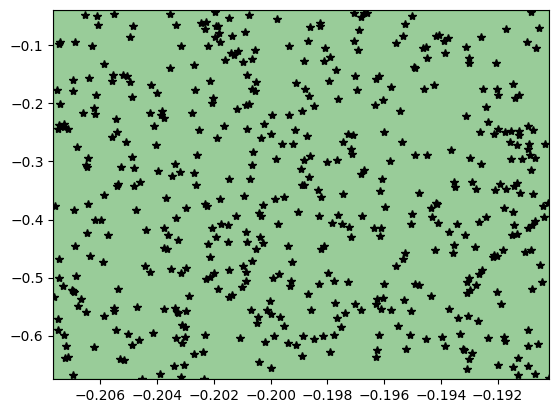

getRange gurobi [lb, ub]:
[[-0.2076619052 -0.1901746642]
 [-0.6752612436 -0.0384002447]]
samples [lb, ub]:
[[-0.2076353241 -0.190193475 ]
 [-0.6752330679 -0.0425271516]]


In [8]:
"""Test SparseStar TanSig"""
def sample_plot(sample):
    n = sample.shape[1]
    for i in range(n):
        plt.plot(sample[0, i], sample[1, i], '*k')
        
def sample_affineMap(sample, W, b):
    n = sample.shape[1]
    sa = s
    for i in range(n):
        sa[:, i] = W @ sample[:, i] + b
    return sa

def sample_tansig(sample):
    n = sample.shape[1]
    sa = s
    for i in range(n):
        sa[:, i] = TanSig.f(sample[:, i])
    return sa

def sample_ranges(sample):
    n, m = sample.shape
    l = np.amin(sample, axis=1)
    u = np.amax(sample, axis=1)
    return l, u

dim = 2
# S = SparseStar.rand_bounds(2)
lb = np.array([-0.2076619052, -0.6752612436])
ub = np.array([-0.1901746642, -0.0384002447])
S = SparseStar(lb, ub)
n_sample = 500
s = S.sample(n_sample)

print(S)

sample_plot(s)
plot_2D_Star(S.toStar())
plt.show()

print('getRange gurobi [lb, ub]:')
print(np.column_stack(S.getRanges('gurobi')))
print('samples [lb, ub]:')
print(np.column_stack(sample_ranges(s)))

W: 
[[0.8296852263 0.6249613968]
 [0.2563563088 0.7306757321]] 
b:[0.1104508255 0.5329835722]
SparseStar Set:
A: 
[[0.1104508255 0.8296852263 0.6249613968]
 [0.5329835722 0.2563563088 0.7306757321]]
C_csc: 
[]
d: []
pred_lb: [-0.2076619052 -0.6752612436]
pred_ub: [-0.1901746642 -0.0384002447]
pred_depth: [0. 0.]
dim: 2
nVars: 2
nZVars: 0




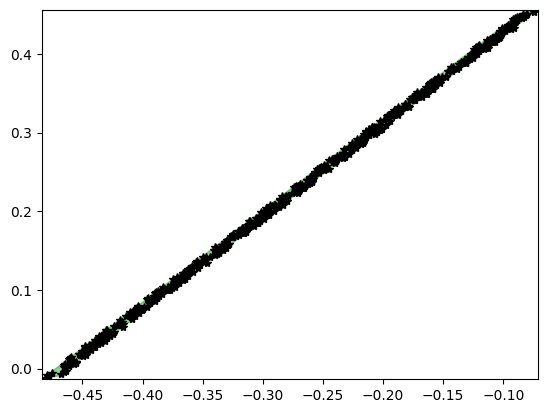

getRange gurobi [lb, ub]:
[[-0.4838553993 -0.0713329544]
 [-0.0136488708  0.4561729703]]
samples [lb, ub]:
[[-0.4812512705 -0.0747598639]
 [-0.0128291     0.4526297994]]


In [9]:
# W = np.random.rand(dim, dim)
# b = np.random.rand(dim)
W = np.array([[0.8296852263, 0.6249613968],
 [0.2563563088, 0.7306757321]] )
b = np.array([0.1104508255, 0.5329835722])
Sa = S.affineMap(W, b)
sa = sample_affineMap(s, W, b)

print('W: \n{} \nb:{}'.format(W, b))
print(Sa)

sample_plot(sa)
plot_2D_Star(Sa.toStar())
plt.show()

print('getRange gurobi [lb, ub]:')
print(np.column_stack(Sa.getRanges('gurobi')))
print('samples [lb, ub]:')
print(np.column_stack(sample_ranges(sa)))

C21:  [[ 0.6621769134  0.4987855582 -1.            0.          ]]
C22:  [[ 0.8254777441  0.6217921058 -1.            0.          ]]
C23:  [[-0.7604807687 -0.5728330557  1.            0.          ]]
d21:  [[-0.0249935231]]
d22:  [[-0.1096497117]]
d23:  [[0.0954088942]]
getRange gurobi [lb, ub]:
[[-0.4493259527 -0.0712122101]
 [-0.0136480233  0.4269599496]]
samples [lb, ub]:
[[-0.4472451513 -0.074620896 ]
 [-0.0128283963  0.4240583028]]


TypeError: only size-1 arrays can be converted to Python scalars

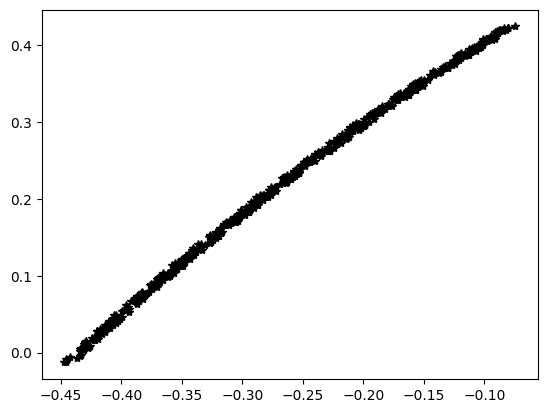

In [10]:
St = TanSig.reach(Sa)
st = sample_tansig(sa)

print('getRange gurobi [lb, ub]:')
print(np.column_stack(St.getRanges('gurobi')))
print('samples [lb, ub]:')
print(np.column_stack(sample_ranges(st)))

sample_plot(st)
plot_2D_Star(St.toStar())
plt.show()